> **DO NOT EDIT IF INSIDE annadl_f19 folder**


# Keras, overfitting, regularlization

- Part 3.1: Basic Keras
- Part 3.2: Regularization and overfitting

[**Feedback**]((https://ulfaslak.com/vent))

In [1]:
%matplotlib inline
%load_ext tensorboard
import matplotlib.pylab as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


## Exercises

### Part 3.1: Basic Keras

> **Ex. 3.1.1** Let's get started with Keras by working with an actual neural network.
1. Implement a very simple `Sequential` model using [*Getting started with the Keras Sequential model*](https://keras.io/getting-started/sequential-model-guide/) as a guide.
2. Fit it to the [mnist](https://keras.io/datasets/#mnist-database-of-handwritten-digits) dataset of handwritten digits that I have prepared below.
3. Compute the accuracy on the test set using the `evaluate` function.
4. BONUS: Can you score over 90% accuracy in just five training epochs?

In [2]:
(x, y), _ = keras.datasets.mnist.load_data()

# Reshape each image to 1dim vector. Effectively, reshape
# `x_train` from (60000, 28, 28) to (60000, 28*28)
x_train = x[:50000].reshape(-1, 28*28)
x_test = x[50000:].reshape(-1, 28*28)

# Convert y_train from vector of labels to one-hot encoding vector
y = keras.utils.to_categorical(y, num_classes=10)
y_train = y[:50000]
y_test = y[50000:]

In [3]:
model = Sequential()

model.add(Dense(input_dim=28*28, units=512, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=5, batch_size=250)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
50000/50000 [==============================] - 5s 100us/step - loss: 0.4301 - acc: 0.8809
Epoch 2/5
50000/50000 [==============================] - 4s 70us/step - loss: 0.2339 - acc: 0.9324
Epoch 3/5
50000/50000 [==============================] - 3s 66us/step - loss: 0.1917 - acc: 0.9431
Epoch 4/5
50000/50000 [==============================] - 3s 67us/step - loss: 0.1675 - acc: 0.9502
Epoch 5/5
50000/50000 [==============================] - 3s 67us/step - loss: 0.1518 - acc: 0.9537


> **Ex. 3.1.2** One of the coolest features we get basically for free when using Keras with the Tensorflow backend is the **Tensorboard**.
It allows us to visualize training and test curves, our network graph, and more, in an interactive format.
Below I have implemented a simple linear regression, adapt and launch a visualization of the training performance.

In [6]:
from datetime import datetime

logdir = './logs/' + datetime.now().strftime("%Y%m%d-%H%M%S") # log file name
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [7]:
x = np.linspace(-1, 1, 101)
y = 3 * x + np.random.randn(*x.shape) * 0.33

model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform', activation='linear'))
model.compile(optimizer='sgd', loss='mse')

model.fit(x, y, nb_epoch=200, verbose=0, callbacks=[tensorboard_callback])

/home/wjung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="uniform")`
  """
/home/wjung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


In [8]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 15229), started 0:09:01 ago. (Use '!kill 15229' to kill it.)

> **Ex. 3.1.3** Solve exercises 1.2.2 and 1.2.3 from week 1, but solve them using Keras.
> Comment on differences in speed (and outcome if you observe any).
You can for example use Tensorboard to inspect the training performance throught the training epochs.

In [9]:
def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-2, -2], 1, size=(int(N/2), 2)),
        np.random.normal([2, 2], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

def generate_X_nonlinear(N=200, R=5):
    X_inner = np.random.normal([0, 0], 1, size=(int(N/2), 2))

    X_outer = np.array([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + np.random.randn(int(N/2), 2)

    X = np.vstack([X_inner, X_outer])
    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

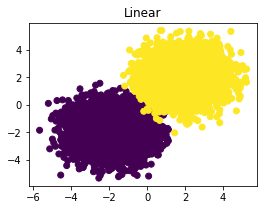

In [10]:
plt.figure(figsize=(9, 3))

X, y = generate_X_linear(10000)
plt.subplot(1, 2, 1)
plt.title("Linear", fontsize=12)
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))

In [11]:
model = Sequential()

model.add(Dense(input_dim=2, units=2, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [12]:
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [13]:
model.fit(X, y, epochs=5, batch_size=20)

Epoch 1/5
10000/10000 [==============================] - 2s 228us/step - loss: 0.3318 - acc: 0.4946
Epoch 2/5
10000/10000 [==============================] - 1s 81us/step - loss: 0.2197 - acc: 0.6538
Epoch 3/5
10000/10000 [==============================] - 1s 66us/step - loss: 0.1627 - acc: 0.9494
Epoch 4/5
10000/10000 [==============================] - 1s 67us/step - loss: 0.1287 - acc: 0.9845
Epoch 5/5
10000/10000 [==============================] - 1s 79us/step - loss: 0.1033 - acc: 0.9901


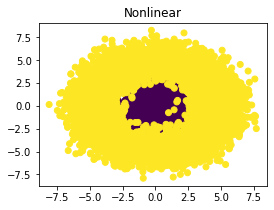

In [19]:
plt.figure(figsize=(9, 3))

X, y = generate_X_nonlinear(10000)
plt.subplot(1, 2, 1)
plt.title("Nonlinear", fontsize=12)
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))

In [15]:
model = Sequential()

model.add(Dense(input_dim=2, units=2, activation='sigmoid'))
model.add(Dense(units=2, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [16]:
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [20]:
model.fit(X, y, epochs=10, batch_size=20)

Epoch 1/10
10000/10000 [==============================] - 1s 148us/step - loss: 0.2502 - acc: 0.5058
Epoch 2/10
10000/10000 [==============================] - 1s 72us/step - loss: 0.2502 - acc: 0.5377
Epoch 3/10
10000/10000 [==============================] - 1s 72us/step - loss: 0.2502 - acc: 0.4778
Epoch 4/10
10000/10000 [==============================] - 1s 70us/step - loss: 0.2501 - acc: 0.5703
Epoch 5/10
10000/10000 [==============================] - 1s 71us/step - loss: 0.2501 - acc: 0.5320
Epoch 6/10
10000/10000 [==============================] - 1s 73us/step - loss: 0.2501 - acc: 0.5276
Epoch 7/10
10000/10000 [==============================] - 1s 75us/step - loss: 0.2501 - acc: 0.4945
Epoch 8/10
10000/10000 [==============================] - 1s 91us/step - loss: 0.2500 - acc: 0.4780
Epoch 9/10
10000/10000 [==============================] - 1s 73us/step - loss: 0.2500 - acc: 0.5159
Epoch 10/10
10000/10000 [==============================] - 1s 116us/step - loss: 0.2500 - acc: 0.53

### Part 3.1: Overfitting and regularization

When a model *overfits* it means that it memorizes the outcomes for each training data point rather than general patterns.
Thus an overfitted model will score extremely well on the training data but poorly on new unseen data. 
In general, the more flexible a model is the easier it will overfit, and for this reason neural networks are notorious overfitters.
Broadly speaking, the way to combat this is to *regularize* the network.

> **Ex. 3.2.1** To understand overfitting, we overfit some data! Let's fit a neural network to data that has no inherent patterns: *noise*.

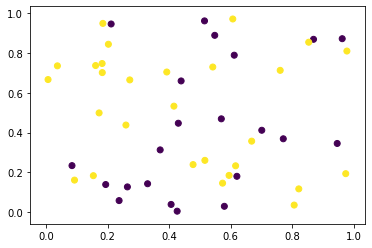

In [21]:
# Generate some data-points
x = np.random.random(size=(50, 2))

# And some random outcomes
y = np.random.randint(0, 2, size=(50, ))

# Plot it
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

> Now, create a network that attains a an accuracy score over 80% in predicting which points are class 0 and which are class 1.
>
> *Hint*: The bigger the network, the bigger the overfitting.

In [66]:
model = Sequential()

model.add(Dense(input_dim=2, units=1024, activation='sigmoid'))
model.add(Dense(units=1024, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 1024)              3072      
_________________________________________________________________
dense_69 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 1025      
Total params: 1,053,697
Trainable params: 1,053,697
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(x,y, epochs=100, batch_size=5)

Epoch 1/100
50/50 [==============================] - 2s 37ms/step - loss: 0.6899 - acc: 0.5600
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.8067 - acc: 0.5200
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.8997 - acc: 0.4800
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.8088 - acc: 0.5200
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.8094 - acc: 0.4800
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 1.2178 - acc: 0.4400
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7376 - acc: 0.5000
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.9915 - acc: 0.4800
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7757 - acc: 0.5000
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.8362 - acc: 0.4800
Epoch 11/100
50/50 [==============================] - 0s 3

50/50 [==============================] - 0s 4ms/step - loss: 0.7143 - acc: 0.5200
Epoch 88/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7793 - acc: 0.3400
Epoch 89/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7455 - acc: 0.5200
Epoch 90/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6892 - acc: 0.6600
Epoch 91/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6775 - acc: 0.6200
Epoch 92/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7139 - acc: 0.5400
Epoch 93/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7208 - acc: 0.4800
Epoch 94/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6983 - acc: 0.5600
Epoch 95/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7402 - acc: 0.5200
Epoch 96/100
50/50 [==============================] - 0s 4ms/step - loss: 0.7087 - acc: 0.5400
Epoch 97/100
50/50 [==============================] - 0s 4ms/st

> **Ex 3.2.2** Norm regularization:
> 1. Apply L2 regularization to your network so that it, across the same number of batches, cannot overfit.
> 2. What does L2 regularization do? Compare the absolute size of weights in the unregularized and regularized model.
>
> *Hint:* `model.weights` will give you a list of weights and bias arrays for each layer. They are in a Tensorflow format but you can call `.numpy()` on them to get them out as numpy arrays.

> **Ex 3.2.3** Early stopping: Often we like to monitor the model's performance on a test set also while we train the model.
This allows us to do something called "early stopping" which is a way of regularizing by stopping the training process before the network overfits (we know it overfits when the performance on the training set starts getting much better than on the test set).
Implement early stopping when training on the random data above. What accuracy do you get?
>
> *Hint*: There's an example [here](https://keras.io/getting-started/faq/#how-can-i-interrupt-training-when-the-validation-loss-isnt-decreasing-anymore).

> **Ex 3.2.4** Dropout: Another clever way to regularize a network, is to randomly "drop out" some fraction of neurons during each training batch, so the network cannot store memory in specific neurons. The method is called Dropout. Go ahead and take your overfitting model and apply dropout in one or more of the layers and comment on the performance.
>
> *Hint*: Check out the reference [here](https://keras.io/layers/core/#dropout).